In [1]:
def png(rgb):   # Numpy is concise enough to create PNG files from raw bytes in one screenful of code
    def chunk(tag, data):
        out = numpy.empty(4 + len(tag) + len(data) + 4, "u1")   # each chunk consists of:
        out[0:4] = numpy.array([len(data)], ">u4").view("u1")   #   4-byte data size
        out[4:8] = numpy.frombuffer(tag, "u1")                  #   4-byte tag (data type)
        out[8:8 + len(data)] = numpy.frombuffer(data, "u1")     #   the data
        crc = zlib.crc32(data, zlib.crc32(tag))                 #   CRC: cyclic redundancy check
        out[-4:] = numpy.array([crc & 0xffffffff], ">u4").view("u1")
        return out

    preamble = numpy.frombuffer(b"\x89PNG\r\n\x1a\n", "u1")     # preamble: "this is a PNG file"
    width_height = numpy.array(rgb.shape[1::-1], ">u4")         # header: size + image type (RGBA)
    header = numpy.concatenate([width_height.view("u1"), numpy.array([8, 6, 0, 0, 0], "u1")])
    headerchunk = chunk(b"IHDR", header.tobytes())

    mini, maxi = rgb.min(), rgb.max()                           # normalize the value ranges
    rgb = ((255 / (maxi - mini))*(rgb - mini)).astype("u1")     # and convert to one byte per channel
    data = numpy.empty((rgb.shape[0], 1 + 4*rgb.shape[1]), "u1")
    data[:, 0], data[:, 4::4] = 0, 255                          # beginning of scanline and opacity
    data[:, 1::4], data[:, 2::4], data[:, 3::4] = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]  # R, G, B
    datachunk = chunk(b"IDAT", zlib.compress(data.tobytes()))  # scanlines are zlib-compressed

    endchunk = chunk(b"IEND", b"")                              # IEND means no more chunks
    return numpy.concatenate([preamble, headerchunk, datachunk, endchunk])

In [2]:
import numpy, zlib, IPython.display

def show(rgb):                  # draw the image in Jupyter
    return IPython.display.display(IPython.display.Image(data=png(rgb)))

def save(filename, rgb):        # save the image to a file
    with open(filename, "wb") as file:
        file.write(png(rgb))

rgb = numpy.zeros((9, 18, 3))   # little example: what do you think it will be?
rgb[:4, :9, 2] = rgb[4:, :, :] = rgb[:, 9:, :] = 1
rgb[::2, :, 1:] = 0
show(rgb); #print(rgb[:, :, 1])

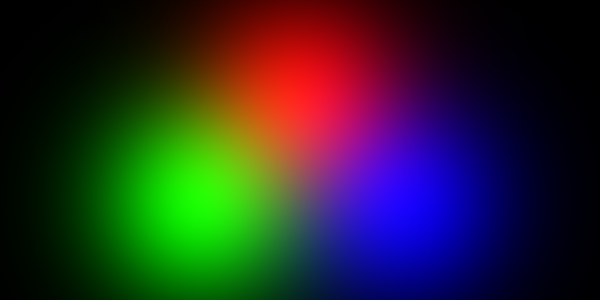

In [3]:
rgb = numpy.zeros((300, 600, 3))
y, x = numpy.mgrid[0:300, 0:600]
rgb[:, :, 0] = numpy.exp(0 - (x - 300)**2/100**2 - (y - 100)**2/100**2)
rgb[:, :, 1] = numpy.exp(0 - (x - 200)**2/100**2 - (y - 200)**2/100**2)
rgb[:, :, 2] = numpy.exp(0 - (x - 400)**2/100**2 - (y - 200)**2/100**2)
show(rgb)

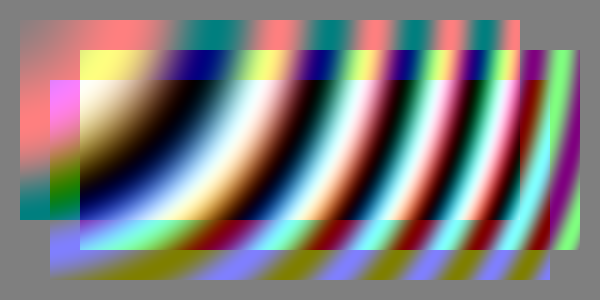

In [4]:
rgb = numpy.zeros((300, 600, 3))
y, x = numpy.mgrid[0:300, 0:600]
rgb[20:220, 20:520, 0] = (numpy.sin(((x +  0)/100)**2 + ((y +  0)/100)**2))[20:220, 20:520]
rgb[50:250, 80:580, 1] = (numpy.sin(((x + 10)/100)**2 + ((y +  0)/100)**2))[50:250, 80:580]
rgb[80:280, 50:550, 2] = (numpy.sin(((x +  0)/100)**2 + ((y + 25)/100)**2))[80:280, 50:550]
show(rgb)

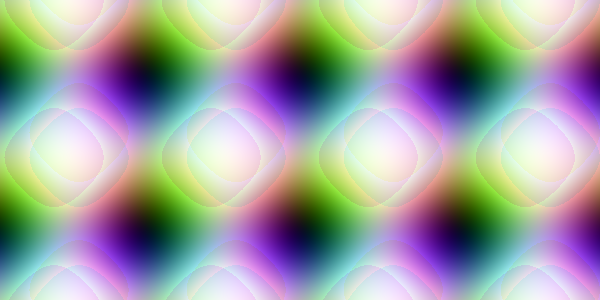

In [5]:
rgb = numpy.zeros((300, 600, 3)); y, x = numpy.mgrid[0:300, 0:600]
rgb[:, :, 0] = numpy.sin((x +  0)/50)**2 + numpy.cos((y +  0)/50)**2
rgb[:, :, 1] = numpy.sin((x + 25)/50)**2 + numpy.cos((y +  0)/50)**2
rgb[:, :, 2] = numpy.sin((x +  0)/50)**2 + numpy.cos((y + 25)/50)**2
rgb[rgb > 1.3] = numpy.sqrt(rgb[rgb > 1.3])
show(rgb)

In [6]:
# Exercise: make something pretty! Then send it to me in the Google Doc.

# rgb = numpy.zeros((300, 600, 3))
# y, x = numpy.mgrid[0:300, 0:600]
# rgb[:, :, 0] = ???
# rgb[:, :, 1] = ???
# rgb[:, :, 2] = ???
# show(rgb)